# EDA & Pre-Processing

# 0. Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
from scipy.stats import zscore
import sweetviz as sv

# 1. EDA

In [2]:
data = pd.read_csv('card_transdata.csv', sep=',')
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [4]:
data['repeat_retailer'] = data['repeat_retailer'].astype(int)
data['used_chip'] = data['used_chip'].astype(int)
data['used_pin_number'] = data['used_pin_number'].astype(int)
data['online_order'] = data['online_order'].astype(int)
data['fraud'] = data['fraud'].astype(int)
# we convert every categorical variable to integer.

In [5]:
for col in data.columns:
    print(data[col].isna().sum())

0
0
0
0
0
0
0
0


We don't have any NaN values which is extrememly usefull for us as we won't have to impute the missing values.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int32  
 4   used_chip                       1000000 non-null  int32  
 5   used_pin_number                 1000000 non-null  int32  
 6   online_order                    1000000 non-null  int32  
 7   fraud                           1000000 non-null  int32  
dtypes: float64(3), int32(5)
memory usage: 42.0 MB


In [7]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# 1.bis : Outliers research

In [ ]:
def calculate_outlier_percentage_and_plot(df, threshold=3):
    """
    Calculate the percentage of outliers in each numeric column of a DataFrame
    using the z-score and display the boxplots.
    
    :param df: pd.DataFrame, the input dataset.
    :param threshold: float, the threshold to define an outlier (default: 3).
    :return: pd.Series, a series containing the percentage of outliers for each column.
    """
    # We select only the non-categorical columns
    numeric_df = df.select_dtypes(include=[float])
    z_scores = numeric_df.apply(zscore)
    
    # Identification of the outliers using the Z-score
    outliers = (z_scores.abs() > threshold)
    
    # Calculation of the percentage of outliers for each column
    outlier_percentage = outliers.sum() / len(df) * 100
    
    #Print the boxplots
    for column in numeric_df.columns:
        plt.figure(figsize=(8, 4))
        plt.boxplot(numeric_df[column].dropna(), vert=False, patch_artist=True)
        plt.title(f'Boxplot of {column} (Outliers: {outlier_percentage[column]:.2f}%)')
        plt.xlabel(column)
        plt.show()
    return outlier_percentage

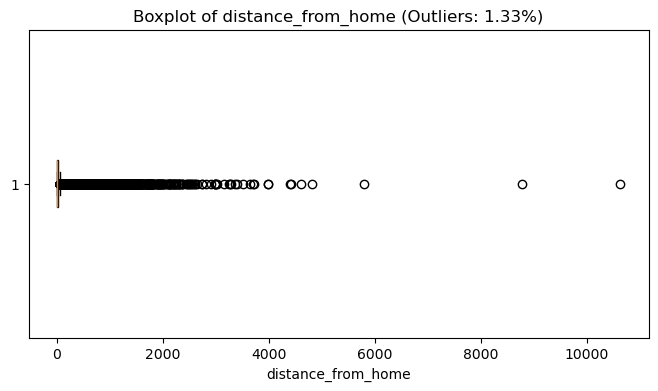

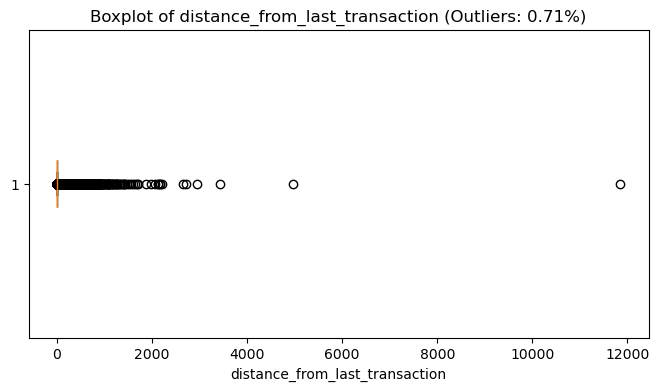

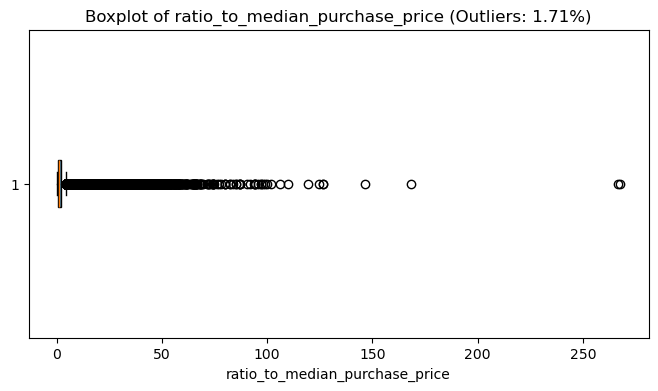

distance_from_home                1.3324
distance_from_last_transaction    0.7099
ratio_to_median_purchase_price    1.7061
dtype: float64


In [16]:
outlier_percentages = calculate_outlier_percentage_and_plot(data)
print(outlier_percentages)

We have a significant amount of outliers data, so we'll have to manage them later.

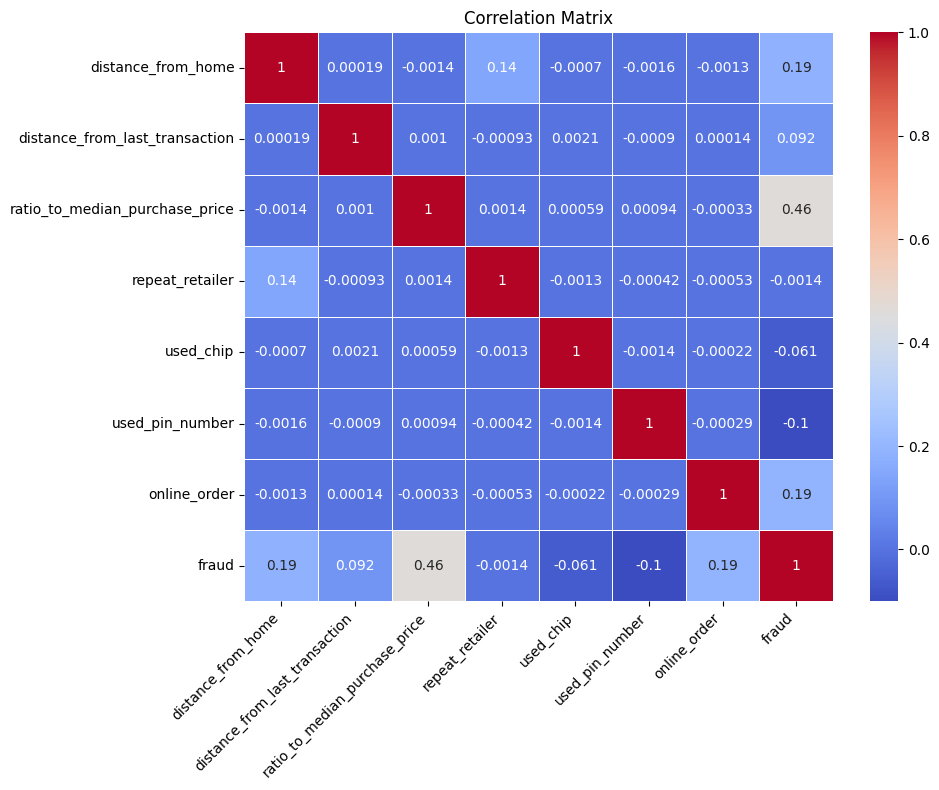

In [8]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

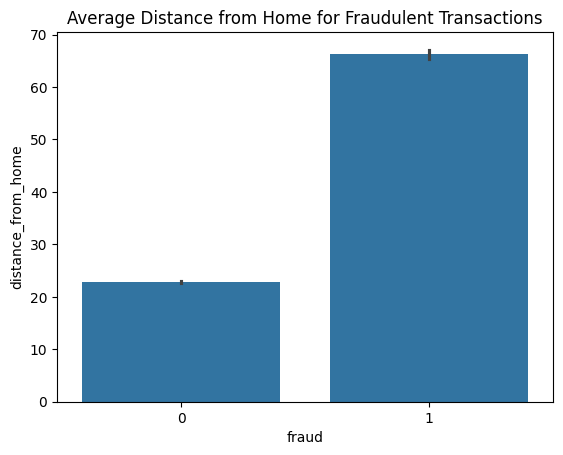

In [9]:
sns.barplot(x='fraud', y='distance_from_home', data=data)
plt.title("Average Distance from Home for Fraudulent Transactions")
plt.show()

We observe that fraudulent transactions are often far in distance from the home of the purchaser, revealing the importance of this feature !

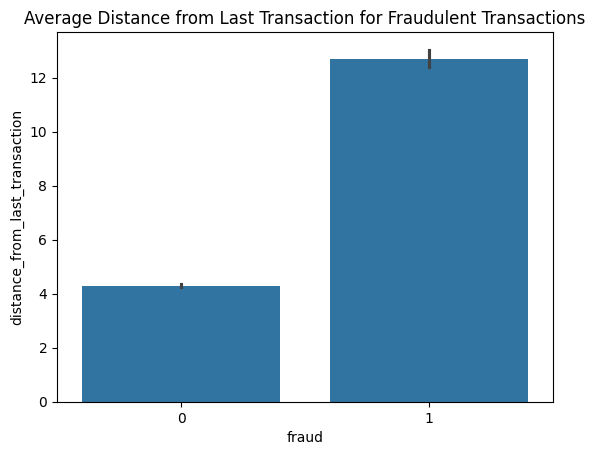

In [10]:
sns.barplot(x='fraud', y='distance_from_last_transaction', data=data)
plt.title("Average Distance from Last Transaction for Fraudulent Transactions")
plt.show()


We observe that fraudulent transactions are often far in distance from the last transaction, revealing the importance of this feature !

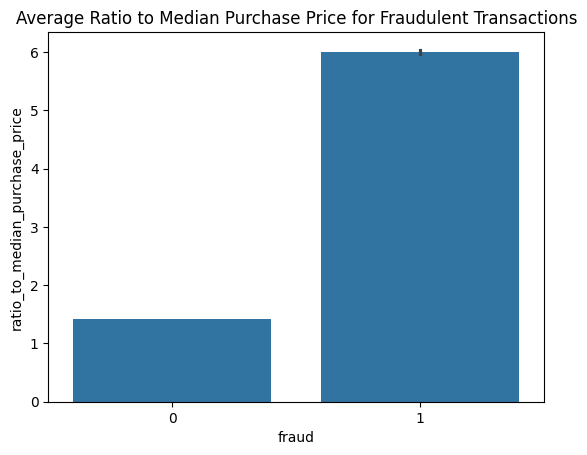

In [11]:
sns.barplot(x='fraud', y='ratio_to_median_purchase_price', data=data)
plt.title("Average Ratio to Median Purchase Price for Fraudulent Transactions")
plt.show()

creation of the sweetviz html document

In [12]:
rapport_target = sv.analyze(data, target_feat='fraud')
rapport_target.show_html('rapport_target.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report rapport_target.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


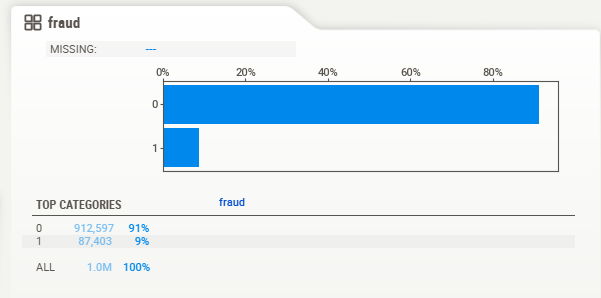

In [13]:
display(Image(filename="Images EDA/fraud_distribution.png"))

9% of transactions are fraud which the sign of an imbalanced dataset, we'll have to solve this problem later

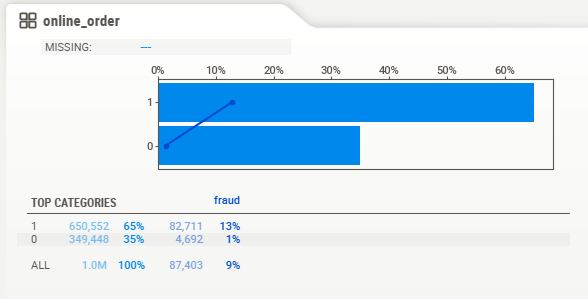

In [14]:
display(Image(filename="Images EDA/online_distribution.png"))

13% of online purchases are fraudulent, compared to only 1% for in-person purchases.

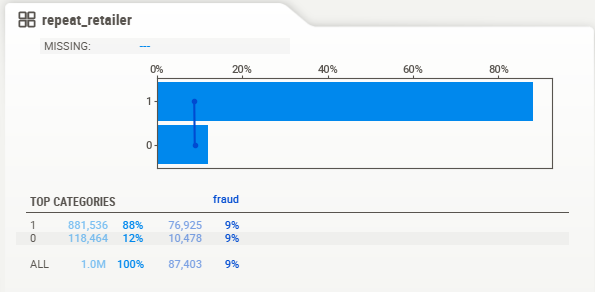

In [15]:
display(Image(filename="Images EDA/reapeat_retailer_distribution.png"))

# 2. Pre-process (fast)

The fact that purchases are repeated or not does not seem to have any influence on whether the transaction is fraudulent or not, so we can drop this column.

In [16]:
data.drop('repeat_retailer', axis=1, inplace=True)

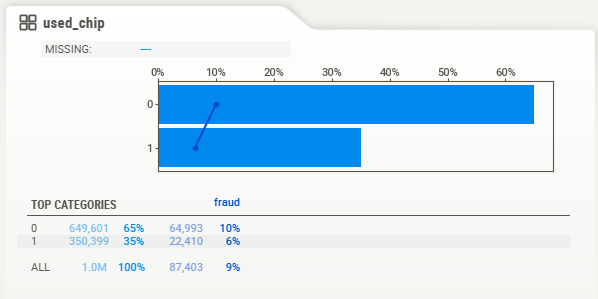

In [17]:
display(Image(filename="Images EDA/used_chip_distribution.png"))

10% of purchases without using a chip are fraudulent, compared to 6% with chip usage.

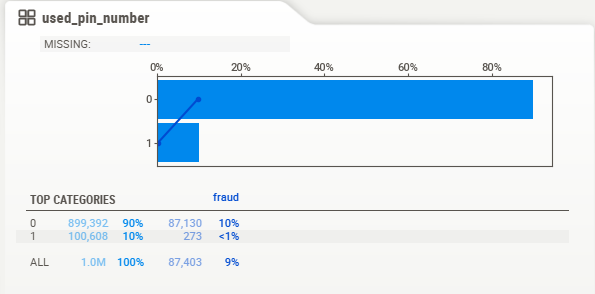

In [18]:
display(Image(filename="Images EDA/used_pin_distribution.png"))

10% of purchases without using a PIN are fraudulent, compared to less than 1% with PIN usage.

# 3. Save the final dataset cleaned

The pre-processing step is very fast as the dataset was almost perfect, the only transformation that we'll have to do is managing the outliers & the imbalanced tendancy of the data probably using SMOTE but we'll do this after the split to avoid any form of data leakage !

In [20]:
data.to_csv("cleaned_data.csv", index=False)